In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv("HR_data.csv")

In [3]:
df.head(5)

,Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Age,left
0,1,0.38,0.53,2,157,3,0,0,sales,low,23.0,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,34.0,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,19.0,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,35.0,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,45.0,1


In [4]:
df['Department'].nunique()

10

In [5]:
df.describe()

,Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Age,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,158.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,34.018987,0.238083
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,10.068220,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,19.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,24.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,35.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,45.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,49.000000,1.000000


In [6]:
df.shape

(14999, 12)

In [7]:
(df.isnull().sum()/14999 )* 100

Id                        0.000000
satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      0.000000
time_spend_company        0.000000
Work_accident             0.000000
promotion_last_5years     0.000000
Department                0.000000
salary                    0.000000
Age                      98.946596
left                      0.000000
dtype: float64

In [8]:
df.isnull().sum()

Id                           0
satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
promotion_last_5years        0
Department                   0
salary                       0
Age                      14841
left                         0
dtype: int64

In [9]:
df=df.drop(columns=["Age","Id"],axis=1)

In [10]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

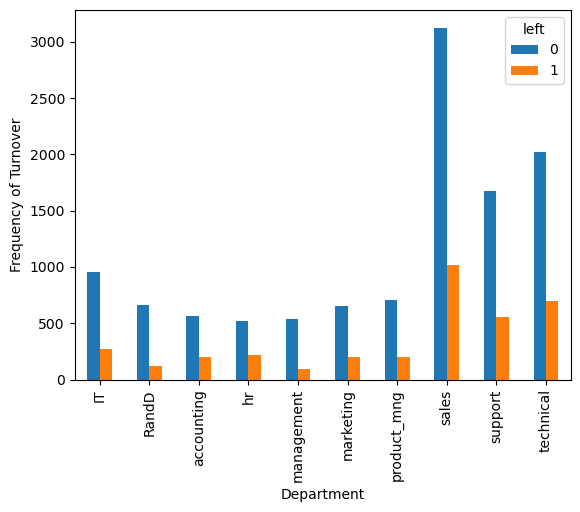

In [12]:
pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

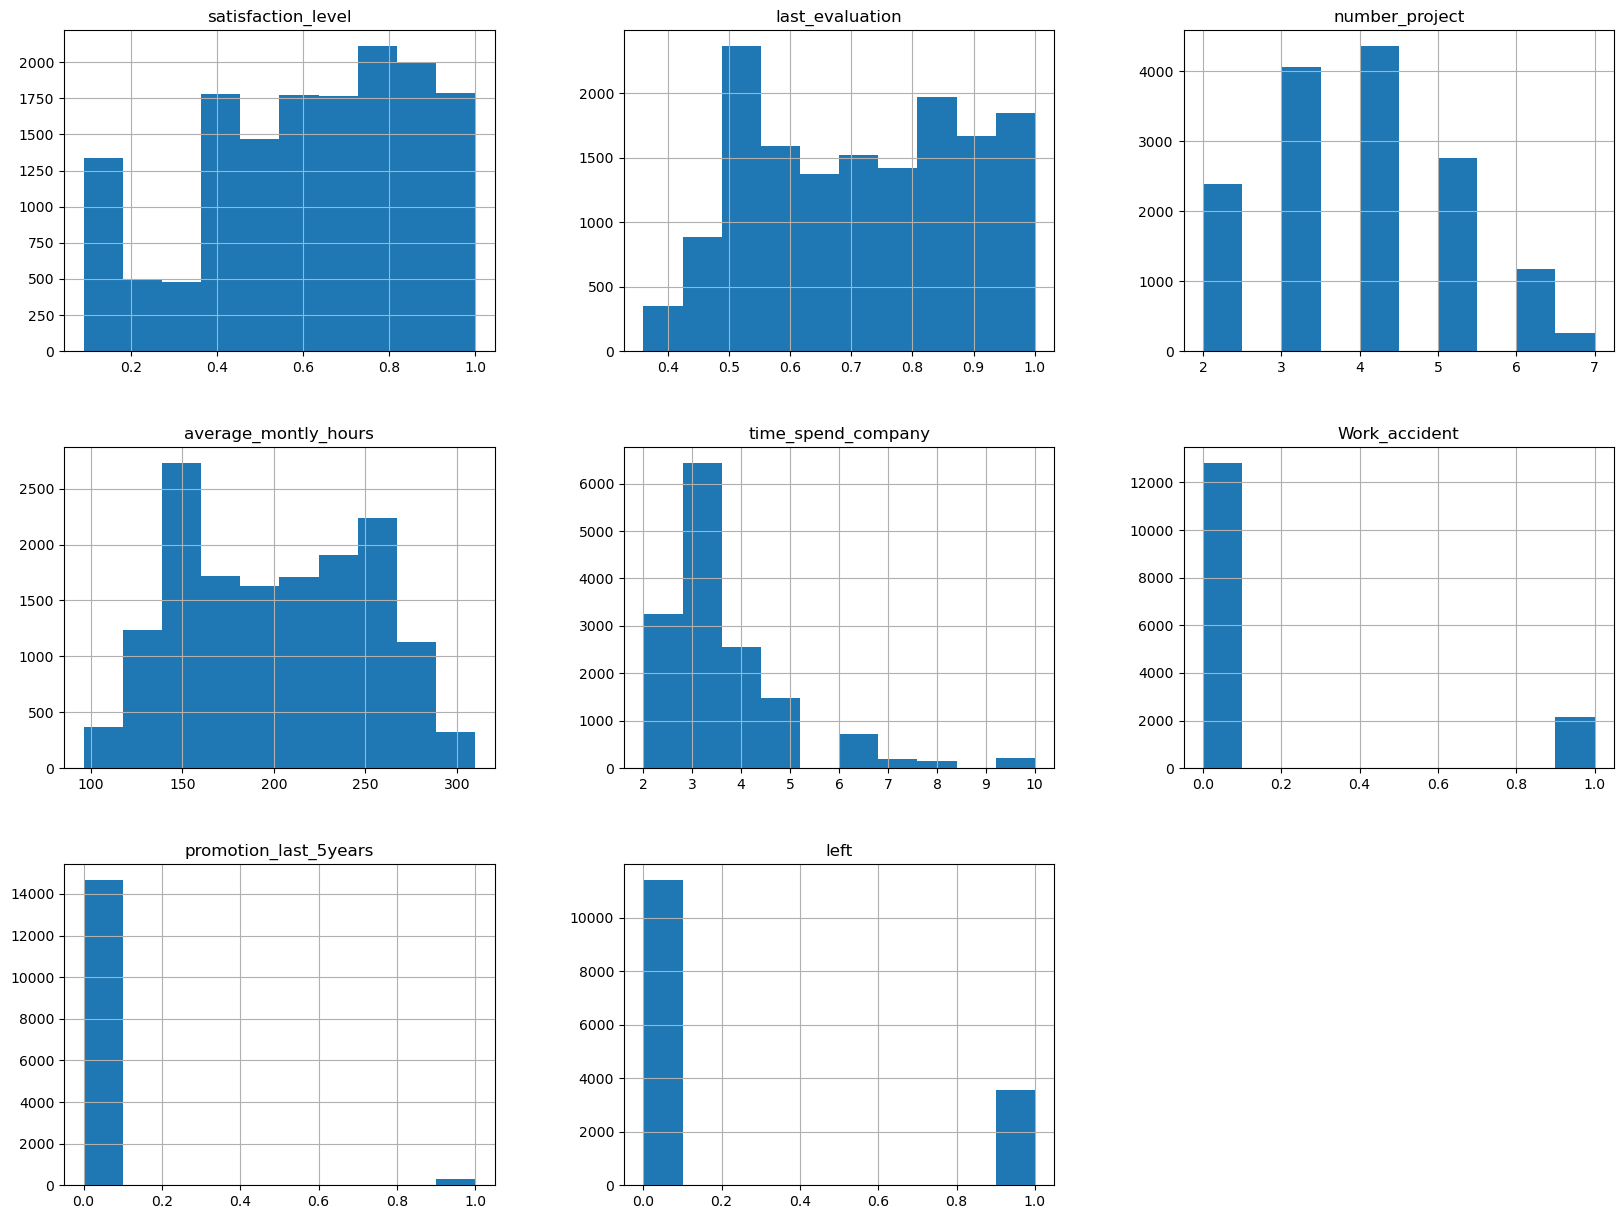

In [13]:
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(11991, 10)

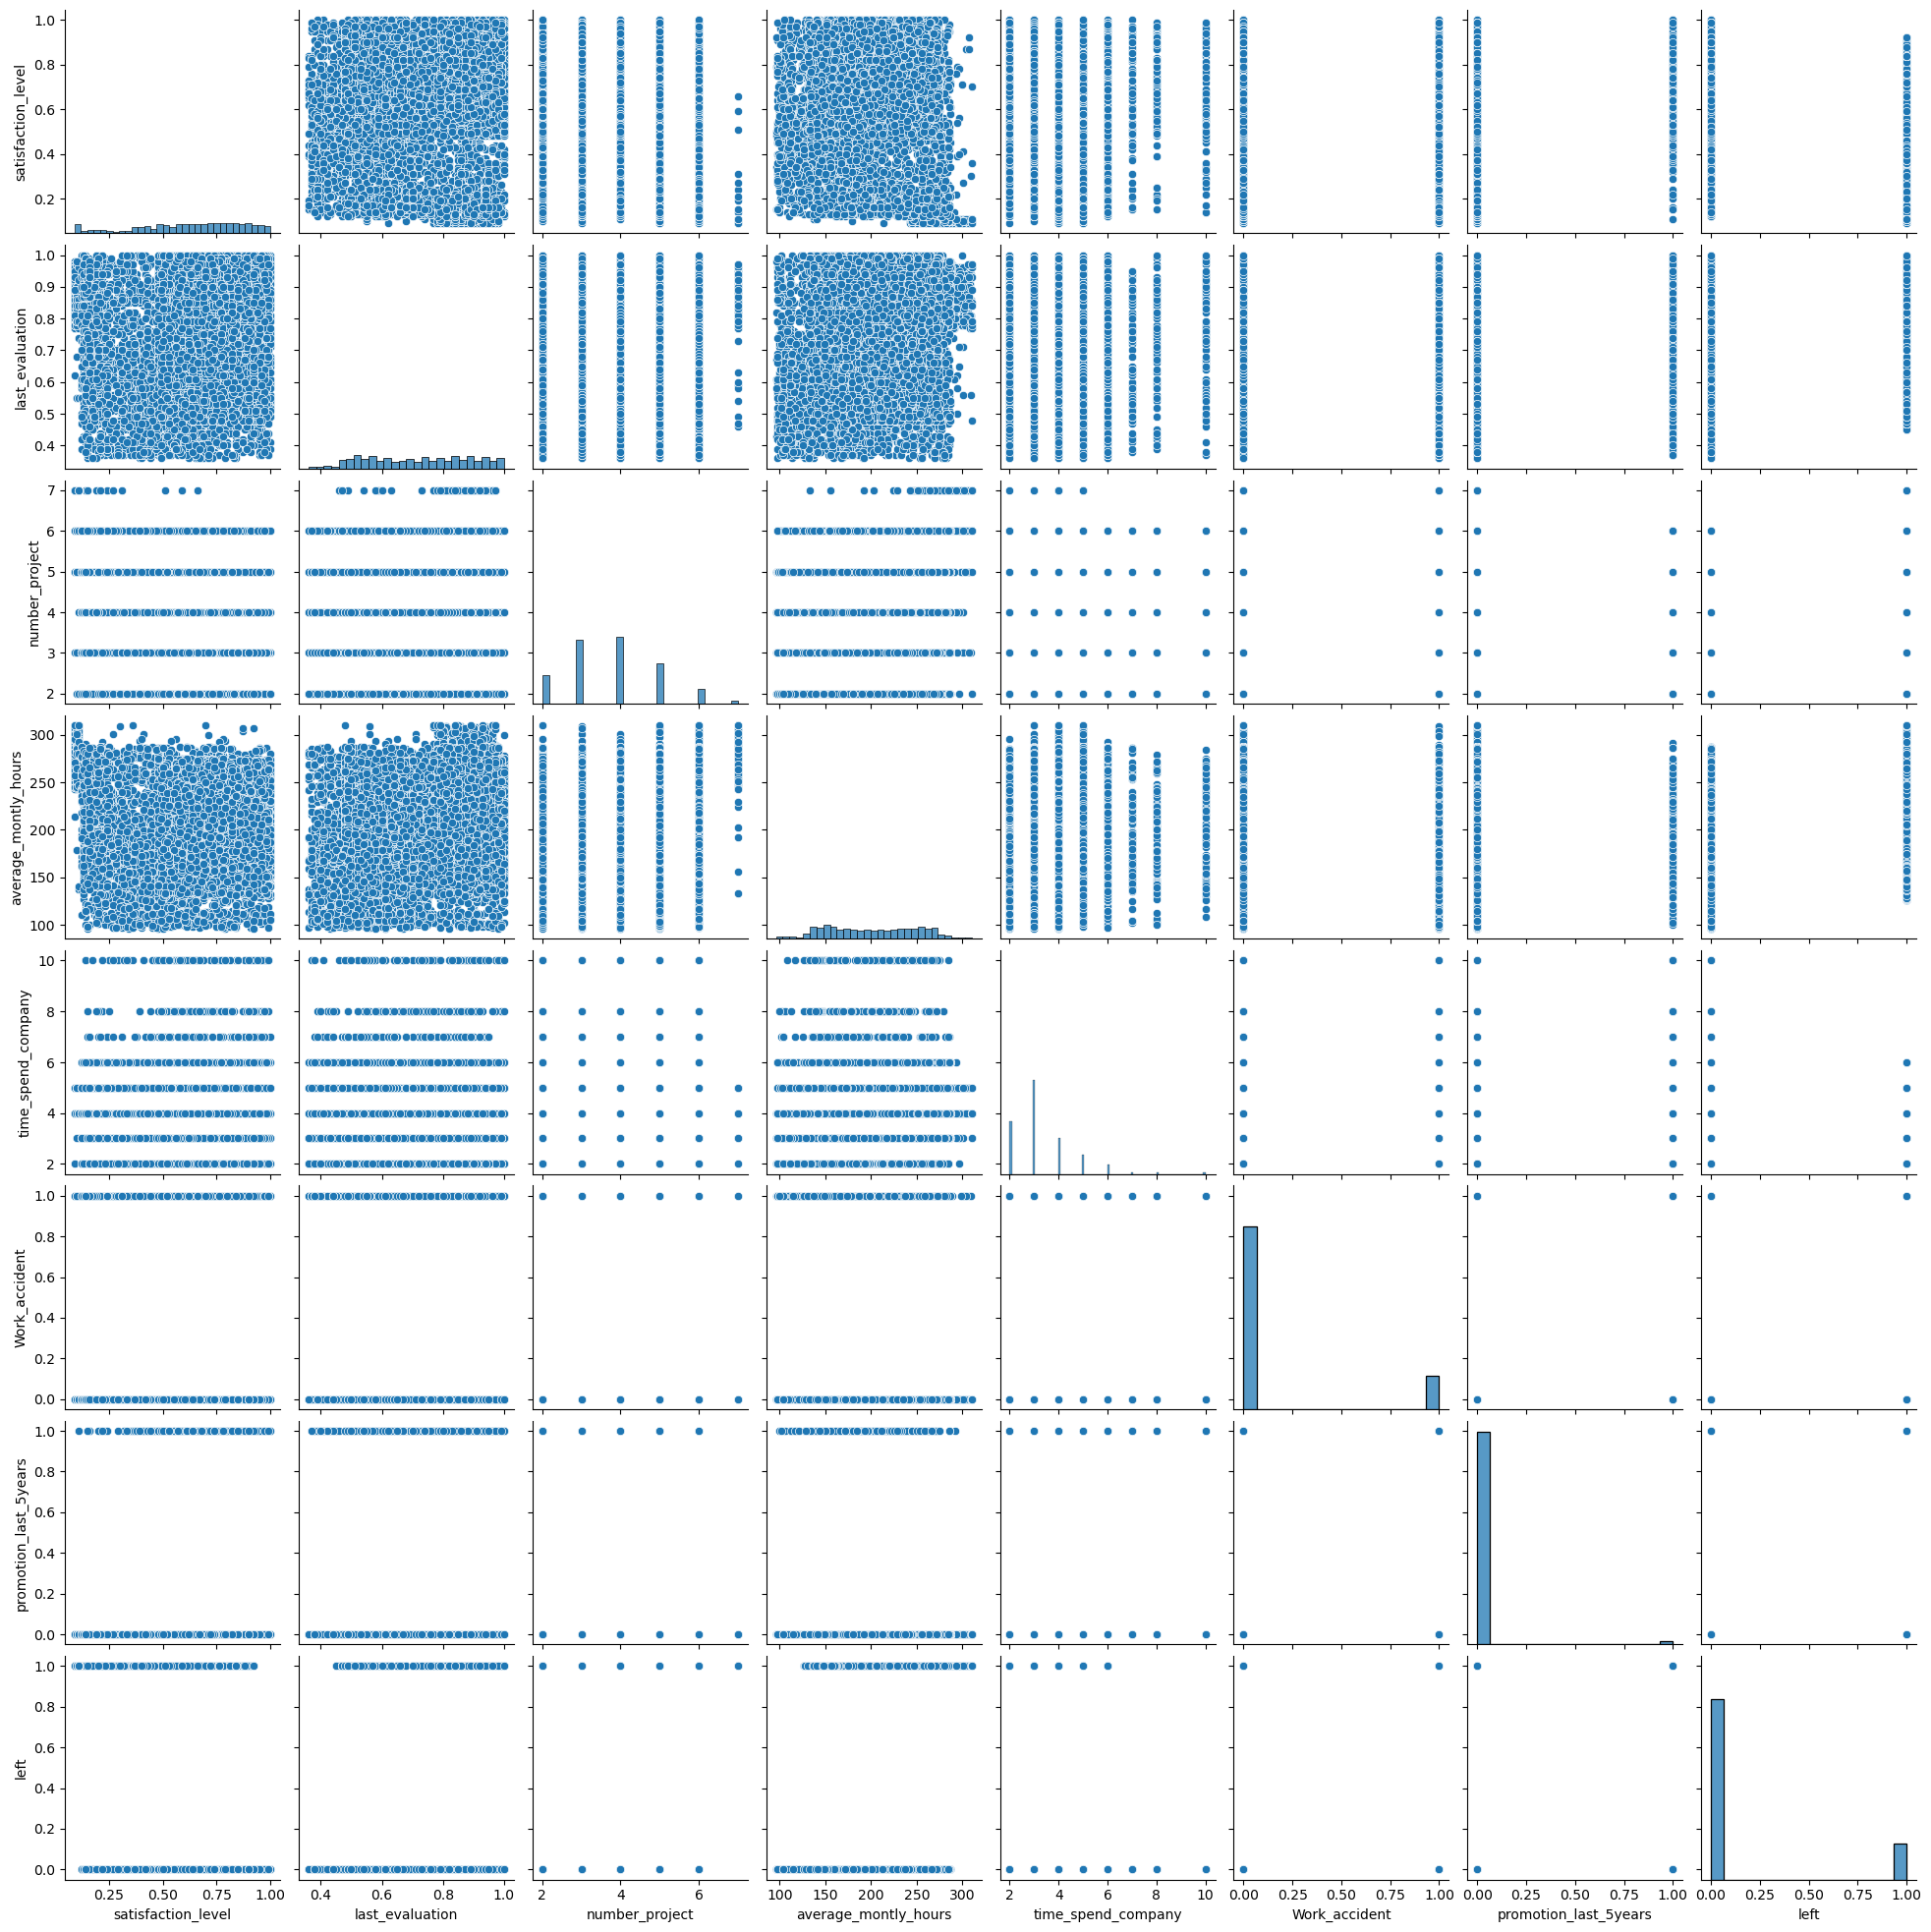

In [16]:
sns.pairplot(data=df,)

C:\Users\ferid\AppData\Local\Temp\ipykernel_7616\327162569.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
C:\Users\ferid\AppData\Local\Temp\ipykernel_7616\327162569.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')


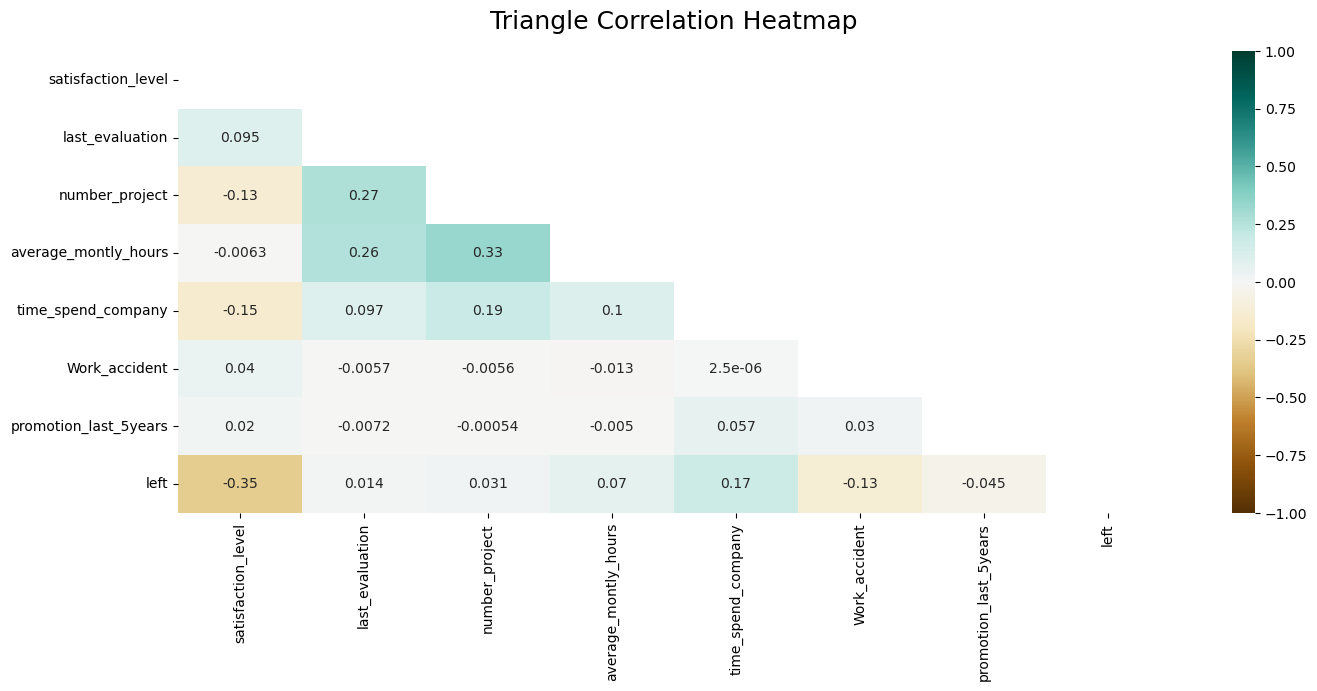

In [17]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

(array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1991.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

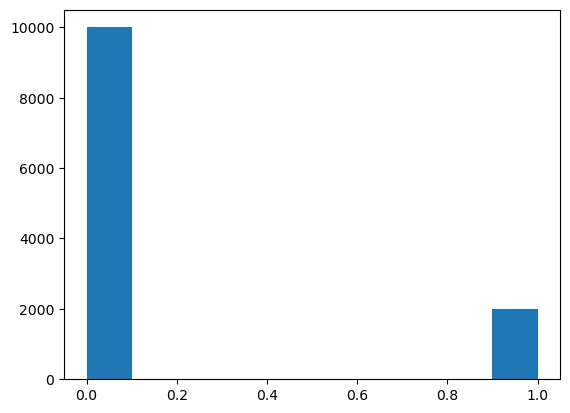

In [18]:
plt.hist(df['left'])
# So there is imbalance problem

In [19]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [20]:
df = pd.get_dummies(data=df,columns=["Department","salary"])

In [21]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [22]:
df.shape

(11991, 21)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [24]:
X=df.drop('left',axis=1)
y=df['left']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
lr = LogisticRegression()

In [28]:
lr.fit(X_train,y_train)

C:\Users\ferid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
dtc = DecisionTreeClassifier()

In [30]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
nb=GaussianNB()

In [32]:
nb.fit(X_train,y_train)

GaussianNB()

In [33]:
xgb=XGBClassifier()

In [34]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [35]:
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [36]:
print("Logistic")
print("accuracy score: ",accuracy_score(y_test,lr.predict(X_test)))
print("recall_score: ",recall_score(y_test,lr.predict(X_test)))
print("precision_score: ",precision_score(y_test,lr.predict(X_test)))

Logistic
accuracy score:  0.8379655364091162
recall_score:  0.15724381625441697
precision_score:  0.4564102564102564


In [37]:
print("DecisionTreeClassifier")
print("accuracy score: ",accuracy_score(y_test,dtc.predict(X_test)))
print("recall_score: ",recall_score(y_test,dtc.predict(X_test)))
print("precision_score: ",precision_score(y_test,dtc.predict(X_test)))

DecisionTreeClassifier
accuracy score:  0.9635908838243469
recall_score:  0.9045936395759717
precision_score:  0.8692699490662139


In [38]:
print("GaussianNB")
print("accuracy score: ",accuracy_score(y_test,nb.predict(X_test)))
print("recall_score: ",recall_score(y_test,nb.predict(X_test)))
print("precision_score: ",precision_score(y_test,nb.predict(X_test)))

GaussianNB
accuracy score:  0.7684824902723736
recall_score:  0.7544169611307421
precision_score:  0.3809099018733274


In [39]:
print("XGBOOST")
print("accuracy score: ",accuracy_score(y_test,xgb.predict(X_test)))
print("recall_score: ",recall_score(y_test,xgb.predict(X_test)))
print("precision_score: ",precision_score(y_test,xgb.predict(X_test)))

XGBOOST
accuracy score:  0.9855475264035576
recall_score:  0.9328621908127208
precision_score:  0.974169741697417


# BEST IS XGBOOST

In [41]:
df2=pd.read_csv("POP.csv")

In [42]:
df2.head(5)

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


In [43]:
df2.isnull().sum()

realtime_start    0
value             0
date              0
realtime_end      0
dtype: int64

In [44]:
df2.describe()

,value
count,816.000000
mean,243847.767826
std,50519.140567
min,156309.000000
25%,201725.250000
50%,239557.500000
75%,289364.250000
max,330309.946000


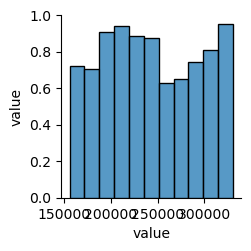

In [45]:
sns.pairplot(df2)

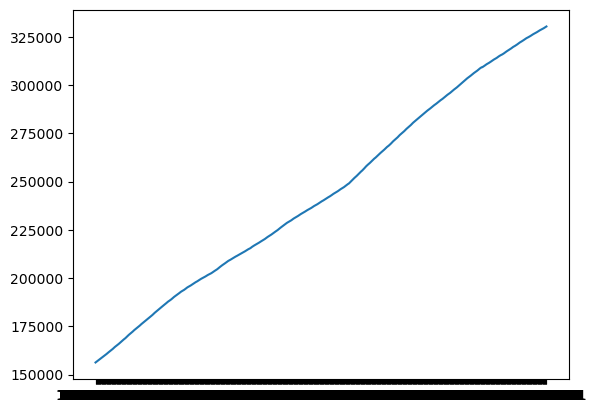

In [46]:
plt.plot(df2['date'],df2['value'])

In [47]:
df2.date=pd.to_datetime(df2.date)
df2.date=pd.to_numeric(df2.date)
df2.corr()

C:\Users\ferid\AppData\Local\Temp\ipykernel_7616\4021743916.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,value,date
value,1.000000,0.998772
date,0.998772,1.000000


In [48]:
# Correlation is almost 1 so it shows that there is an upward trend( linear enahnce ) for values

In [49]:
from prophet import Prophet

In [50]:
df2.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,-568080000000000000,2019-12-06
1,2019-12-06,156527.0,-565401600000000000,2019-12-06
2,2019-12-06,156731.0,-562896000000000000,2019-12-06
3,2019-12-06,156943.0,-560217600000000000,2019-12-06
4,2019-12-06,157140.0,-557625600000000000,2019-12-06


In [51]:
df2['realtime_start']=pd.to_datetime(df2['realtime_start'])
df2['realtime_end']=pd.to_datetime(df2['realtime_end'])
df2.date=pd.to_datetime(df2.date)


In [52]:
model=Prophet(growth='linear')

In [53]:
df2.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


In [54]:
df2 = df2.drop(["realtime_start","realtime_end"],axis=1)

In [55]:
df2['ds']=df2['date']
df2['y']=df2['value']

In [56]:
df2=df2.drop(["value","date"],axis=1)

In [57]:
model.fit(df2)

03:59:09 - cmdstanpy - INFO - Chain [1] start processing
03:59:09 - cmdstanpy - INFO - Chain [1] done processing
